<a href="https://colab.research.google.com/github/teaoskakac/lab1BP/blob/master/181149_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>
<li>EDA</li>
<li>Visualizations</li>
</ul>


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

# <font color = 'Orange'> Read your Dataset (.csv)</font>

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
# Setting up 'requests' to make HTTPS requests properly takes some extra steps... we'll skip them for now.
requests.packages.urllib3.disable_warnings()
# Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def get_data(url):
  snapshot_url = url
  snapshot = requests.get(snapshot_url)
  soup = BeautifulSoup(snapshot.text, 'html.parser')
  

# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



*write here ..*

Visualize the target column

In [5]:
from google.colab import files
uploaded = files.upload()

Saving bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv to bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv


In [7]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv']))

In [9]:
df2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

> Indented block

> Indented block

*   List item
*   List item







In [10]:
((df2.isnull() | df2.isna()).sum() * 100 / df2.index.size).round(2)

Timestamp             0.0
Open                 25.6
High                 25.6
Low                  25.6
Close                25.6
Volume_(BTC)         25.6
Volume_(Currency)    25.6
Weighted_Price       25.6
dtype: float64

Visualize the missing values using Missingno library

1.   List item
2.   List item



In [15]:

import missingno as msno


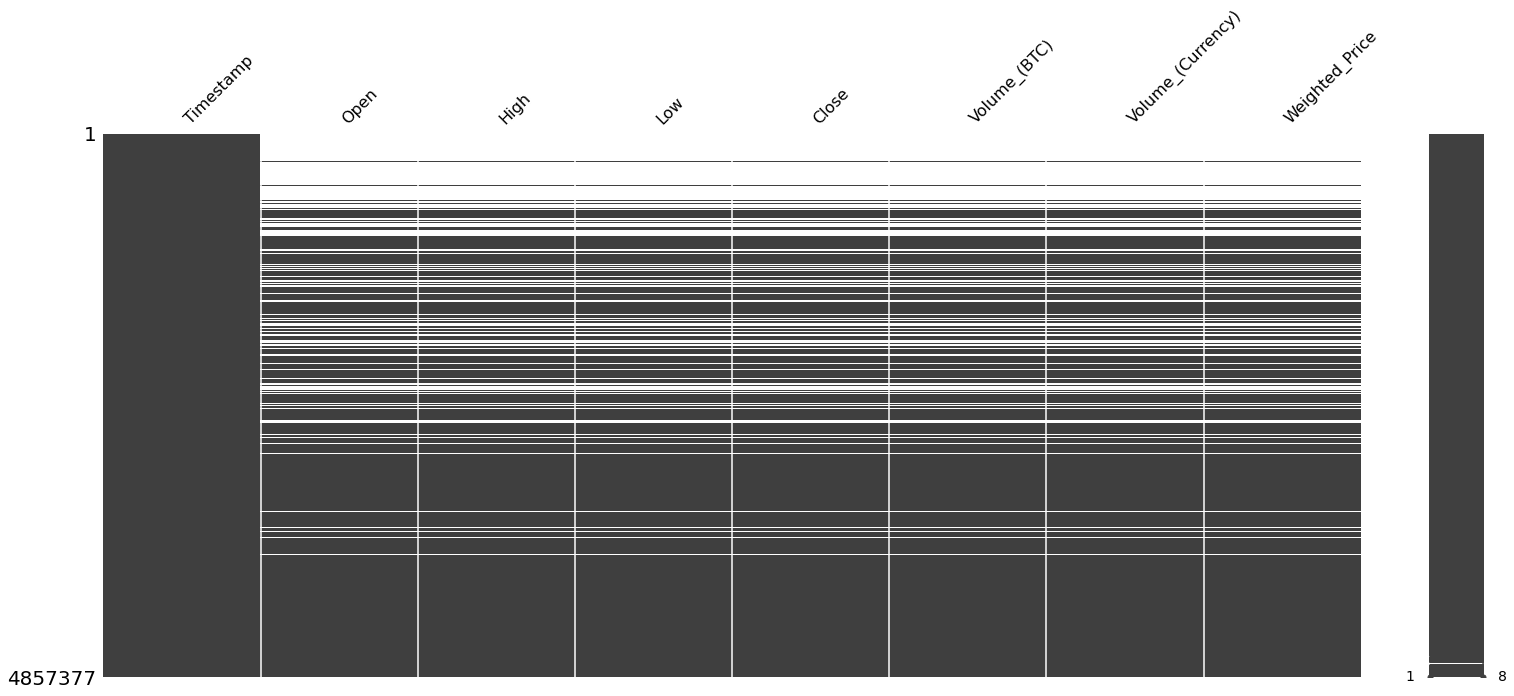

In [16]:
msno.matrix(df2)

## <font color = 'Orange'> Find reasons for the missing values</font> 


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

In [20]:
import missingno

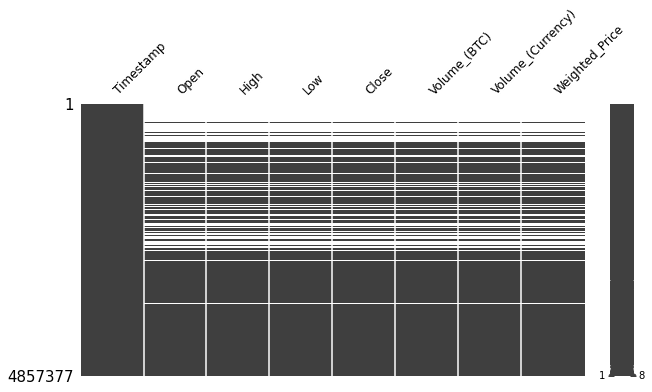

In [22]:
missingno.matrix(df2, figsize=(10,5), fontsize=12);

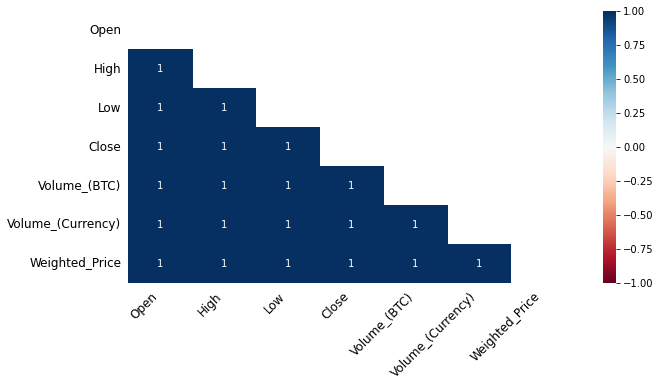

In [27]:
missingno.heatmap(df2, figsize=(10,5), fontsize=12);

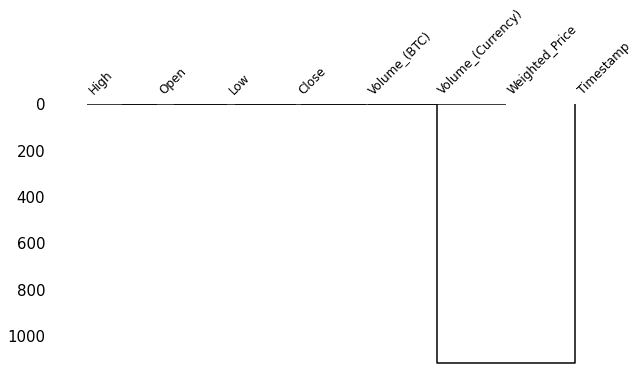

In [29]:
missingno.dendrogram(df2, figsize=(10,5), fontsize=12);

Write the reasons for the missing values

Missing data, or missing values, occur when you don't have data stored for certain variables or participants. Data can go missing due to incomplete data entry, equipment malfunctions, lost files, and many other reasons. In any dataset, there are usually some missing data.


## <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


In [30]:
ds = df2.isnull()['Open'].reset_index()

In [31]:
ds

,index,Open
0,0,False
1,1,True
2,2,True
3,3,True
4,4,True
...,...,...
4857372,4857372,False
4857373,4857373,False
4857374,4857374,False
4857375,4857375,False


In [32]:
ds[ds['Open']==True]

,index,Open
1,1,True
2,2,True
3,3,True
4,4,True
5,5,True
...,...,...
4856245,4856245,True
4856308,4856308,True
4856376,4856376,True
4857340,4857340,True


In [34]:
df2['Open']

0              4.39
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
4857372    58714.31
4857373    58683.97
4857374    58693.43
4857375    58742.18
4857376    58767.75
Name: Open, Length: 4857377, dtype: float64

# <font color = 'Orange'> Encode non numerical values </font> 

If this is still not passed on the classes just erase these columns

In [36]:
df2[df2['Open'].isna()]['Open']

1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
           ..
4856245   NaN
4856308   NaN
4856376   NaN
4857340   NaN
4857368   NaN
Name: Open, Length: 1243608, dtype: float64

In [39]:
df2

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [40]:
df2_copy = df2.copy()

Print the first rows of your final Dataset

In [41]:
df2.copy

<bound method NDFrame.copy of           Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0        1325317920      4.39      4.39      4.39      4.39      0.455581   
1        1325317980       NaN       NaN       NaN       NaN           NaN   
2        1325318040       NaN       NaN       NaN       NaN           NaN   
3        1325318100       NaN       NaN       NaN       NaN           NaN   
4        1325318160       NaN       NaN       NaN       NaN           NaN   
...             ...       ...       ...       ...       ...           ...   
4857372  1617148560  58714.31  58714.31  58686.00  58686.00      1.384487   
4857373  1617148620  58683.97  58693.43  58683.97  58685.81      7.294848   
4857374  1617148680  58693.43  58723.84  58693.43  58723.84      1.705682   
4857375  1617148740  58742.18  58770.38  58742.18  58760.59      0.720415   
4857376  1617148800  58767.75  58778.18  58755.97  58778.18      2.712831   

         Volume_(Currency)  Weighted_Price  


#<font color='orange'>EDA</font>

## <font color='Orange'>Find statistic elements for the continuous variables</font>
Like mean, median,  standard deviation, minimum, maximum, quantile,geometric mean

In [43]:
df2.median()

Timestamp            1.471428e+09
Open                 3.596970e+03
High                 3.598190e+03
Low                  3.595620e+03
Close                3.597000e+03
Volume_(BTC)         1.979811e+00
Volume_(Currency)    3.810124e+03
Weighted_Price       3.596804e+03
dtype: float64

In [44]:
df2.std()

Timestamp            8.428019e+07
Open                 8.996247e+03
High                 9.003521e+03
Low                  8.988778e+03
Close                8.996360e+03
Volume_(BTC)         3.054989e+01
Volume_(Currency)    1.518248e+05
Weighted_Price       8.995992e+03
dtype: float64

In [45]:
df2.mean()

Timestamp            1.471301e+09
Open                 6.009024e+03
High                 6.013357e+03
Low                  6.004488e+03
Close                6.009014e+03
Volume_(BTC)         9.323249e+00
Volume_(Currency)    4.176284e+04
Weighted_Price       6.008935e+03
dtype: float64

In [46]:
df2.quantile()

Timestamp            1.471428e+09
Open                 3.596970e+03
High                 3.598190e+03
Low                  3.595620e+03
Close                3.597000e+03
Volume_(BTC)         1.979811e+00
Volume_(Currency)    3.810124e+03
Weighted_Price       3.596804e+03
Name: 0.5, dtype: float64

In [47]:
df2.iloc[:, 3:5]

,Low,Close
0,4.39,4.39
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
4857372,58686.00,58686.00
4857373,58683.97,58685.81
4857374,58693.43,58723.84
4857375,58742.18,58760.59


## <font color = 'Orange'>Find the frequencies for the categorical variables 




In [ ]:
from scipy import stats

stats.gmean(df2.iloc[:,3:5], axis=0)#add your code

In [51]:
df2.Timestamp.value_counts()

1325317920    1
1520001660    1
1520001540    1
1520001480    1
1520001420    1
             ..
1422853800    1
1422853740    1
1422853680    1
1422853620    1
1617148800    1
Name: Timestamp, Length: 4857377, dtype: int64

In [52]:
df2.Open.value_counts()

580.00      622
450.00      622
635.00      568
448.00      562
570.00      550
           ... 
8537.99       1
3278.26       1
10103.76      1
3288.96       1
58767.75      1
Name: Open, Length: 1059732, dtype: int64

In [54]:
df2.High.value_counts()

450.00      745
580.00      680
635.00      660
570.00      630
650.00      629
           ... 
7580.83       1
7576.21       1
7578.28       1
2040.40       1
58770.38      1
Name: High, Length: 1030826, dtype: int64

In [55]:
df2.Low.value_counts()

580.00      689
620.00      684
448.00      664
570.00      657
450.00      656
           ... 
3883.29       1
3883.60       1
3882.46       1
3883.50       1
58755.97      1
Name: Low, Length: 1046536, dtype: int64

In [56]:
df2.Close.value_counts()

450.00      730
580.00      717
570.00      691
635.00      653
620.00      653
           ... 
7857.40       1
2029.04       1
7863.62       1
7859.94       1
58778.18      1
Name: Close, Length: 1058685, dtype: int64

# <font color = 'Orange'>Data visualization </font>

## <font color = 'Orange'>Find the distribution of given attributes</font>


Which of the attributes(columns) did you choose?


Timestamp and Open


**Make the visualizations using histograms, bar charts, etc.**

In [57]:
import matplotlib.pyplot as plt

(array([1.30e+09, 1.35e+09, 1.40e+09, 1.45e+09, 1.50e+09, 1.55e+09,
        1.60e+09, 1.65e+09]), <a list of 8 Text major ticklabel objects>)

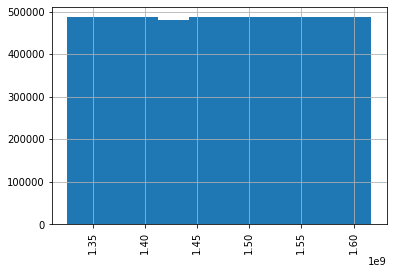

In [58]:
df2['Timestamp'].hist()
plt.xticks(rotation=90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]), <a list of 9 Text major ticklabel objects>)

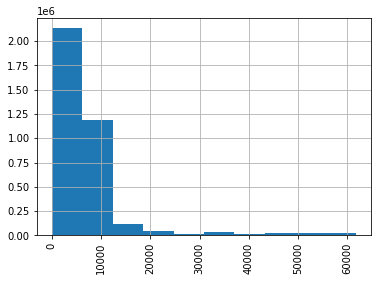

In [60]:
df2['Open'].hist()
plt.xticks(rotation=90)


Add as many codeboxes as you need

## <font color = 'Orange'>Visualize the relationship between the attributes</font>

(array([1.30e+09, 1.35e+09, 1.40e+09, 1.45e+09, 1.50e+09, 1.55e+09,
        1.60e+09, 1.65e+09]), <a list of 8 Text major ticklabel objects>)

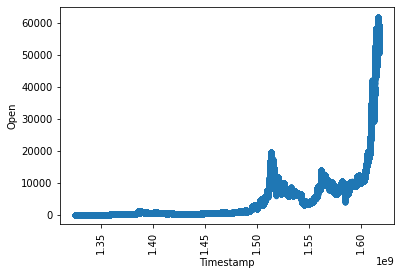

In [61]:
df2.plot.scatter(x='Timestamp', y='Open')
plt.xticks(rotation=90)

## <font color = 'Orange'>Make comparison of the columns</font>

Using multiple histograms, box-plots, scatter plots, pairplots, etc.


In [62]:
import seaborn as sns

(array([1.30e+09, 1.35e+09, 1.40e+09, 1.45e+09, 1.50e+09, 1.55e+09,
        1.60e+09, 1.65e+09]), <a list of 8 Text major ticklabel objects>)

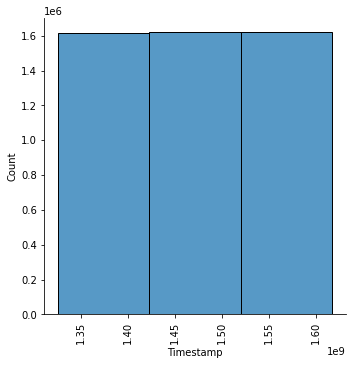

In [63]:
sns.displot(df2['Timestamp'], bins=3, kde=False)
plt.xticks(rotation=90)

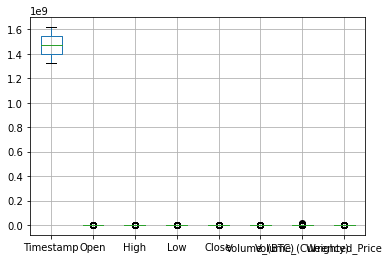

In [64]:
df2.boxplot()

# <font color = 'Orange'>EXTRA: Complex visualizations</font> 
For this you will need a basic knowladge of the Plotly library: https://plotly.com/graphing-libraries/
and for deploying the visualization as a web app you will need the Dash library for that take a look of: https://github.com/plotly/dash

